In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from CA_4_support import *

from matplotlib import animation,rc
from IPython.display import HTML

<div class="alert alert-info">

<h1>Motivation: modelling the transport of pollution in water</h1>





The time-dependent advection diffusion equation is a partial differential equation (PDE) that is often used to model the transport of pollutants. 

<img src="pollutant.png" width=400>

$$\frac{\partial u}{\partial t} + v \frac{\partial u}{\partial x} - D\frac{\partial^2 u}{\partial x^2} = 0$$

where $u$ is the concentration of pollutant, $x$ is the position on the water, $t$ is the time, $D$ is the diffusion rate in the $x$-direction, and $v$ is the fluid velocity. 


Note that now our solution $u$ is a function of $x$ and $t$. Our goal is to find 

$$u(x,t)$$
    
</div>

# Time-Dependent Advection Diffusion Equation


We need to define initial and boundary conditions in order to solve this PDE. To keep it simple, we will make the following assumptions:


- the velocity is constant and equal to $1$

- the diffusion coefficient is equal to $0.1$

- the domain of interest is defined for $x \in [-1,1]$ 

- Boundary conditions:

$$u(-1,t) = 0 \textrm{   for any    } t$$ 

$$\frac{\partial u}{\partial x}(1,t)=0 \textrm{   for any    } t$$

These boundary conditions state that for any given time, we know the pollutant concentration at the start of the domain and the derivative of the pollutant concentration at the end of the domain.

- Initial conditions:

$$u(x,0) = g(x) \textrm{   for any    } x$$

This initial condition states that at the initial time $t = 0$ (when the simulation starts), the pollutant concentration inside the domain is known, and given by the function $g(x)$.


In order to solve this PDE we again use the SEM.  However, the equation is time dependent, so we also partition the time dimension:

$$0 = t_0 < t_1 < t_2 < \dots$$

We assume the $t_i$'s are evenly spaced with distance $\Delta t$.

Since the solution $u$ depends on both space and time ($u(x,t)$), for each time $t_n$, we can define a vector of values of $u$:

$$\mathbf{u}^{(n)} = [u_1^{(n)},\dots, u_N^{(n)}]^T$$ 






Here $u_i^{(n)} = u(x_i,t_n)$.  We assume we know $u(x,0)$ so that $\mathbf{u}^{(0)}$ is known.  Then we get a *timestepping scheme*:

\begin{align}
\mathbf{A}\mathbf{u}^{(1)} &= \mathbf{b}^{(0)}\\
\mathbf{A}\mathbf{u}^{(2)} &= \mathbf{b}^{(1)}\\
\mathbf{A}\mathbf{u}^{(3)} &= \mathbf{b}^{(2)}\\
&\ \vdots\\
\mathbf{A}\mathbf{u}^{(i+1)} &= \mathbf{b}^{(i)}\\
&\ \vdots\\
\mathbf{A}\mathbf{u}^{(n+1)} &= \mathbf{b}^{(n)}
\end{align}



**We provide:**

For each timestep $n$ you can use the function:


```python
bn = SEM_rhs_2(un)
```
to get the right-hand side $\mathbf{b}^{(n)}$, which is a vector that depends on the concentration $\mathbf{u}^{(n)}$ (at the same timestep). The input argument `un` is a 1d numpy array with shape `(N+1)` including the boundary conditions. The return value `bn` is a 1d numpy array with shape `(N,)`, since it excludes the first entry corresponding to the concentration $u_0^{(n)}$ from the boundary condition.


**We also provide:**

```python
A,x =  SEM_system_2(N, dt)
```

that takes $N$ the number of intervals in space and the time interval $dt$, and returns the points $x_i$ in the interval $([-1,1]$ and the system matrix $\mathbf{A}$. 

The return 1d numpy array `x` has shape `(N+1,)`, since it includes the end points. The system matrix `A` is stored as a 2d numpy array with shape `(N,N)`.
    


**And we assume:**

In [2]:
dt = 0.01        # time increment
timesteps = 200  # number of time steps
N = 50           # polynomial order (space discretization)

**Check your answers:** 

Define the system matrix ${\bf A}$ and the array with the discretized points ${\bf x}$ :

In [3]:
#grade_clear
A,x = SEM_system_2(N,dt)

We will store all the vectors $\mathbf{u}^{(0)}$, $\mathbf{u}^{(1)}$, $\mathbf{u}^{(2)}$,$\dots$ as columns of a matrix `utotal`. Here we initialize with zeros the 2d numpy array (matrix) $\mathbf{u}$ with the appropriate shape.

In [4]:
utotal = np.zeros((N+1,timesteps+1))

We also provide a function that defines the initial condition $u(x,0)$.  

In [5]:
def g(z):
    a = -10*(z+1)*z**6*(z-1)*(z< 0)
    return a

**Check your answers:** 

Obtain the vector $\mathbf{u}^{(0)}$ corresponding to the initial condition for the pollutant concentration. Store it in the variable `ut0`.

In [6]:
#grade_clear
ut0 = g(x)

 Update the first column of `utotal` using `ut0`

In [7]:
utotal[:,0] = ut0

Plot the initial pollutant concentration:

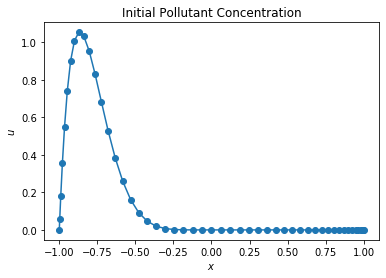

In [8]:
plt.plot(x,utotal[:,0],'o-')
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.title('Initial Pollutant Concentration')
plt.show()

**Check your answers:** 

Generate the array $\mathbf{b}$ corresponding to the initial condition `ut0`. Store it in the variable `b0`

In [9]:
#grade_clear
b0 = SEM_rhs_2(ut0)

**Check your answers:** 

Let's take the first time step and store the solution in `ut1`. Make sure you are handling the size of your arrays correctly and including the boundary condition.

Store `ut1` in the appropriate column of `utotal`.

In [10]:
#grade_clear
u_new = la.solve(A,b0)
ut1 = np.append(0,u_new)   # add back boundary condition
utotal[:,1] = ut1

**Check your answers:** 

Now you can take the second time step, and store your solution in `ut2`. Also store `ut2` in the appropriate column of `utotal`:

In [11]:
#grade_clear
u_old = utotal[:,1]
bn = SEM_rhs_2(u_old)
u_new = np.linalg.solve(A,bn)
ut2 = np.append(0,u_new) # add back boundary 
utotal[:,2] = ut2

Let's plot what you have so far:

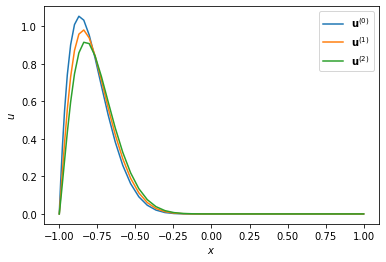

In [12]:
plt.plot(x,utotal[:,0],label = '$\mathbf{u}^{(0)}$')
plt.plot(x,utotal[:,1],label ='$\mathbf{u}^{(1)}$' )
plt.plot(x,utotal[:,2],label = '$\mathbf{u}^{(2)}$')
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend()
plt.show()

Only 198 time steps to go...
We'll obviously want to do this in a loop.  But calling `np.linalg.solve` every time step is too expensive.  We'll want to use the LU decomposition of $A$ to make computing the solution less expensive.  Here $\mathbf{A} = \mathbf{PLU}$, where $\mathbf{P}^{-1} = \mathbf{P}^T$ and $\mathbf{L}$ and $\mathbf{U}$ are lower and upper diagonal matrices

The equation

$\mathbf{A}\mathbf{u}^{(n+1)} = \mathbf{b}^{(n)}$

is transformed into 

$\mathbf{PLUu}^{(n+1)} = \mathbf{b}^{(n)}$



**Check your answers:** 

Write a code snippet that:

- Computes the LU factorization of $\mathbf{A}$ ONCE using `scipy.linalg.lu`.

- Uses `scipy.linalg.solve_triangular` to compute the solution $\bf{u}^{(n+1)}$

Check out the documentation for `scipy.linalg.solve_triangular` before you use them.  In particular, pay attention to the argument `lower`, and `unit_diagonal`

- Update all the remaining columns of `utotal` (we will be checking this variable in the `#grade` cell below).

In [13]:
import scipy.linalg as sla

In [14]:
#grade_clear
P,L,U = sla.lu(A)

for i in range(2,timesteps):
    u_old = utotal[:,i]
    b = SEM_rhs_2(u_old)
    b1 = (P.T).dot(b)
    b2 = sla.solve_triangular(L,b1,lower=True,unit_diagonal=True)
    u_new = sla.solve_triangular(U,b2,lower=False,unit_diagonal=False)
    utotal[:,i+1] = np.append(0,u_new)

We can plot the time history of the solution using a movie:

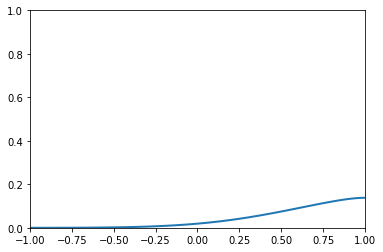

In [15]:
fig,ax = plt.subplots()
ax.set_xlim((-1,1))
ax.set_ylim((0,1.0))
line, = ax.plot([],[],lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    y = utotal[:,i]
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=50, blit=True)
rc('animation',html='html5')
anim